In [4]:
from importlib import reload
import mod1
mod1 = reload(mod1)

In [5]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from collections import Counter

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

In [7]:
df = mod1.load_data()
X = mod1.build_array_feature(df).T
y = np.array(df['Class'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.5,
                                                    random_state=0)

In [24]:
nb_trees = np.arange(50,151,50)
max_depths = np.arange(1,11)

In [26]:
list_frp_rt = list()
list_tpr_rt = list()

for i in range(len(nb_trees)):
    clf = RandomForestClassifier(n_estimators=nb_trees[i], max_depth=5, random_state=0)
    clf.fit(X_train, y_train)
    y_pred = clf.predict_proba(X_test)[:,1]
    fpr_rt, tpr_rt, _ = roc_curve(y_test, y_pred)
    list_frp_rt.append(fpr_rt)
    list_tpr_rt.append(tpr_rt)

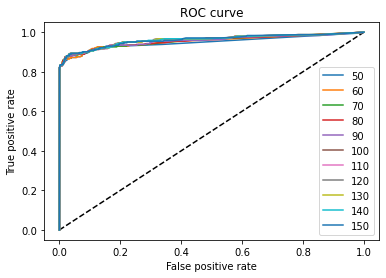

In [29]:
def plot_roc(nb_trees, list_fpr_rt, list_tpr_rt):
    plt.figure(1)
    plt.plot([0, 1], [0, 1], 'k--')
    for i in range(len(nb_trees)):
        plt.plot(list_fpr_rt[i], list_tpr_rt[i], label=nb_trees[i])
    plt.xlabel('False positive rate')
    plt.ylabel('True positive rate')
    plt.title('ROC curve')
    plt.legend(loc='best')
    plt.show()
    
plot_roc(nb_trees, list_frp_rt, list_tpr_rt)

In [10]:
Counter(y_pred)

Counter({0: 71144, 1: 58})

In [11]:
Counter(y_test)

Counter({0: 71108, 1: 94})

In [12]:
Counter(np.abs(y_test-y_pred))

Counter({0: 71164, 1: 38})